# Predicting heart disease using Machine learning
 This notebook looks into using various Python-based machine learning and data science libraries in an attempt
 to build a machine learning model capable of predicting whether or not someone has heart disease based on their 
 medical attributes

   * We are going to take the following approach:
   * 1. Problem defination
   * 2. Data
   * 3. Evaluation
   * 4. Features
   * 5. Modelling
   * 6. Experiment

## 1.Problem Defination
    In a statement
    >Given clinical parameters about patient, can we predict whether or not they have heart disease?

## 2.Data
    The original data came from Cleavland data from UCI Machine learning Repository.
    There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation
    If we can reach %95 accuracy at predicting whether or nat a patient has h.d during the proof of concept,we 
    will pursue the project

## 4.Features

 This is where you will get different information about each of features in your data
 
 **Data dict**
    
   * age - age in years      * 
sex - (1 = male; 0 = female    )   * 
cp - chest pain ty p       * e
0: Typical angina: chest pain related decrease blood supply to the hea       * rt
1: Atypical angina: chest pain not related to he       * art
2: Non-anginal pain: typically esophageal spasms (non heart rela       * ted)
3: Asymptomatic: chest pain not showing signs of e         i   * sease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for     c   * oncern
chol - serum cholestoral 
   * i       * n mg/dl
serum = LDL + HDL + .2 * trigl       * ycerides
above 200 is cause f
       * o   * r concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true;
            * 0 = false)
'>126' mg/dL sign
         a   * ls diabetes
restecg - resting electrocardiogr
     a       * phic results
0: No       * thing to note
1: ST-T W
         a           * ve abnormality
can range from mild symptoms to            * severe problems
signals non-
             n       * ormal heart beat
2: Possible or definite left ventr
         i           * cular hypertrophy
Enlarged heart's m
             a   * in pumping chamber
thalach - maximum    * heart rate achieved
exang - exercise induced angi   * na (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy h   * eart will stress more
slope - the slope of the pe      *  ak exercise ST segment
0: Upsloping: better heart rate wi      *  th excercise (uncommon)
1: Flatsloping: minimal change      *  (typical healthy heart)
2: Downslopins:   *  signs of unhealthy heart
ca - number of major vessels (   * 0-3) colored by flourosopy
colored vessel means the doctor can se   * e the blood passing through
the more blood mo   * vement the better (no clots)      *  
thal - thal      *  ium stress result
1,3: normal
6: fixed defec      *  t: used to be defect but ok now
7: reversable defect: no proper   *  blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
we are going to use pandas, numpy,matplotlip for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
## load Data
df=pd.read_csv("heart-disease.csv")
df.shape#(#rows,columns)

(303, 14)

## Data Exploration (exploratory data anaylsis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with

 What questions are you trying to solve?
    
    * 1.What kind of data do we have and how do we treat dşfferent types?
    * 2.What missing from the data and how do deal with it?
    * 3.Where are the outliers and why should you care about them?
    * 4.How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<Axes: xlabel='target'>

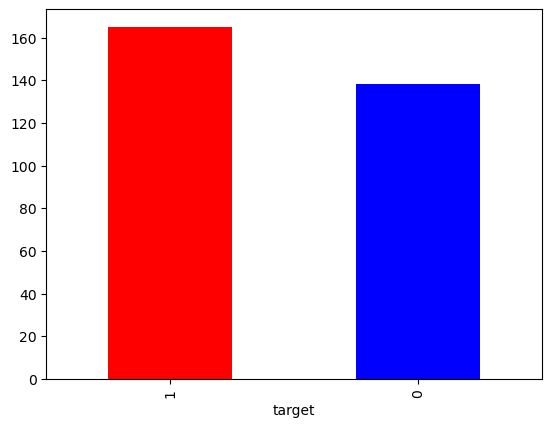

In [5]:
# Lets find out how many each class there
df["target"].value_counts().plot.bar(color=["red","blue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


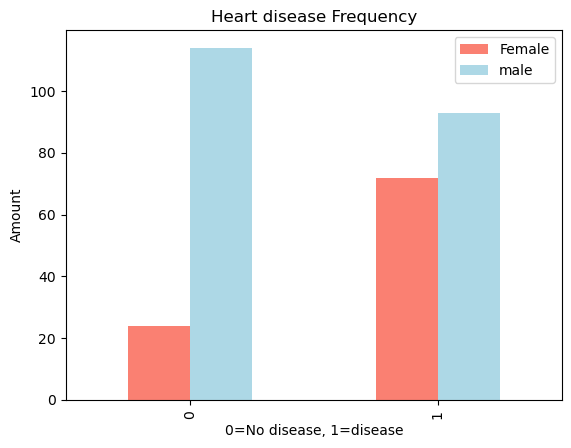

In [11]:
pd.crosstab(df.target,df.sex).plot.bar(color=["salmon","lightblue"])
plt.title("Heart disease Frequency")
plt.xlabel("0=No disease, 1=disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])

### Age vs Max Heart Rate for H Disease

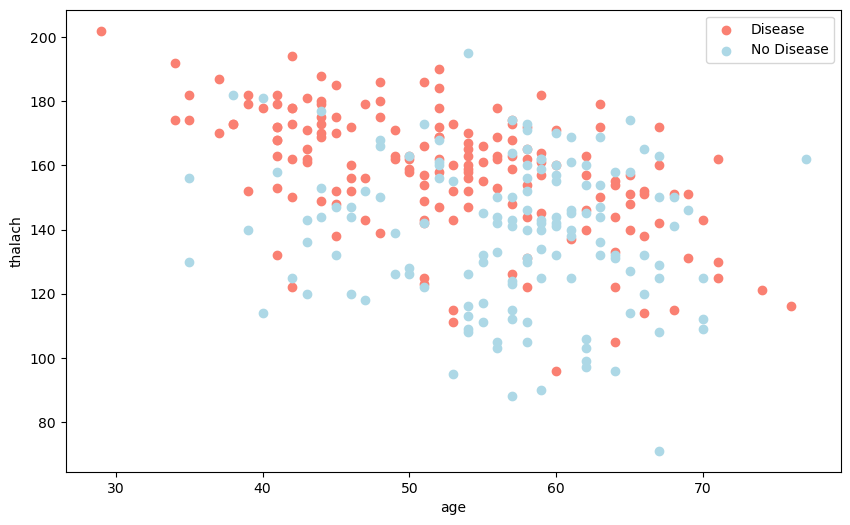

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")
plt.legend(["Disease","No Disease"])
plt.xlabel("age")
plt.ylabel("thalach");

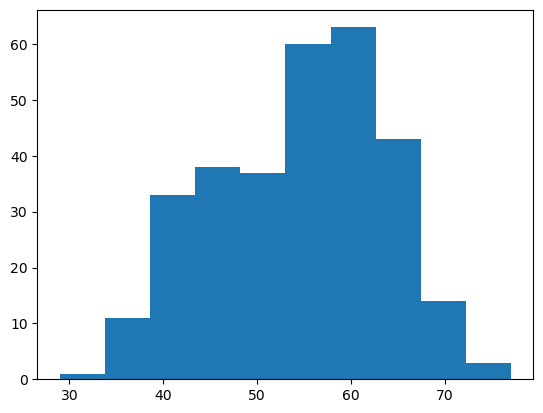

In [13]:
plt.hist(df.age);

### Heart disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart*     * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart relate
    * 3: Asymptomatic: chest pain not showing signs of diseaseasese

In [14]:
pd.crosstab(df.cp,df.target )

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


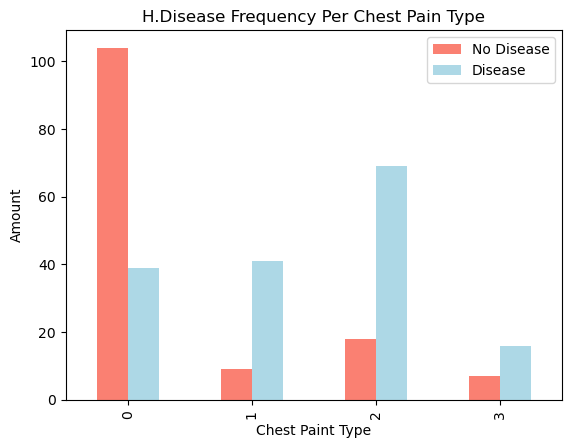

In [15]:
pd.crosstab(df.cp,df.target).plot.bar(color=["salmon","lightblue"]) 
plt.title("H.Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Paint Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])


In [16]:
# Make a correlation matrix
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


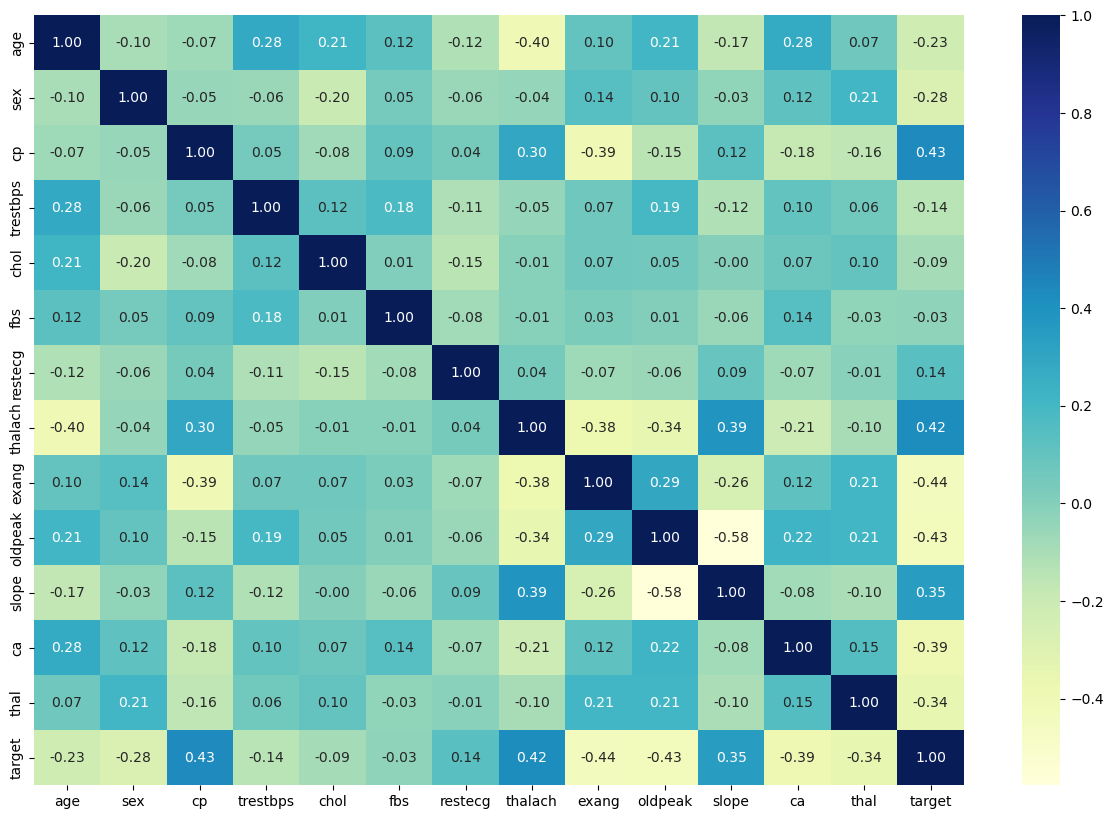

In [17]:
fig ,ax=plt.subplots(figsize=(15,10))
ax=sb.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="YlGnBu");

* A higher positive value means a potential positive corelation
    * Like cp and target
* A highher negative value means a potential negative corelation or a decrease 
    * Like ca and target
* **Positive corelation** = a relationship between two variables in which one variable **increases** as the other **increases**
* **Negative corelation** = a relationship between two variables in which one variable **increases** as the other **decreases**

In [41]:
np.random.seed(42)
X=df.drop("target",axis=1)
y=df.target
X_train,X_Test,y_train,y_test=train_test_split(X,y,test_size=0.2)

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [19]:
# put boled in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "K-Nearest Neighbors":KNeighborsClassifier(),
        "Random Forest Classifier":RandomForestClassifier()}
def fit_and_score(models,xtrain,xtest,ytrain,ytest):
    """
    Fits and evaluating given machine learning models.
    """
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(xtrain,y_train)
        model_scores[name]=model.score(xtest,ytest)
    return model_scores

In [20]:
scores=fit_and_score(models,X_train,X_Test,y_train,y_test)
scores

C:\Users\hp\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [21]:
# Lets make more visualize
score_df=pd.DataFrame(scores,index=["accuracy"])
score_df

,Logistic Regression,K-Nearest Neighbors,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


<Axes: >

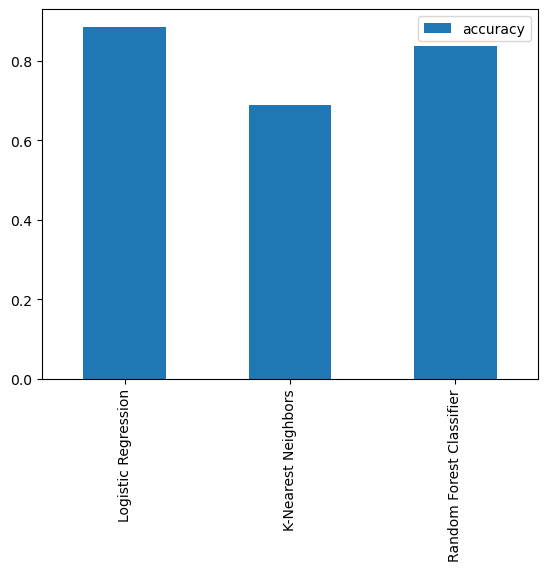

In [22]:
score_df.T.plot.bar()

Now we have got a baseline model.. and we know a models first predictions arent always what we should based our next steps pff. What should we do?
Lets look at the following:
 *Hyperparameter tuning
 * Feature importance
 * Confusion Matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 Score 
 * Classification report
 * Roc curve
 * Area under the curve 

In [23]:
#Tuning KNN
knn_score=[]
knn=KNeighborsClassifier()
neighbors= range(1,25)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_score.append(knn.score(X_Test,y_test))
knn_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361]

max score is 0.7540983606557377


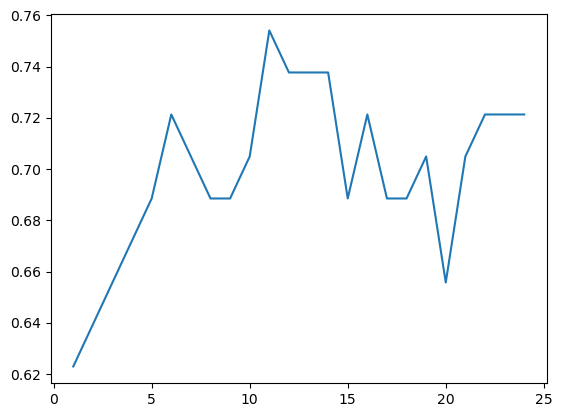

In [24]:
plt.plot(neighbors,knn_score,label="Test Score")
print(f"max score is {max(knn_score)}");

## Hyperparameter tuning with RandomizedSearchCV
We are going to tune

    * Logistic Regression
    * RandomForestClassidier

In [25]:
np.random.seed(42)
# create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [26]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,cv=5,verbose=True)
rs_log_reg.fit(X_train,y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(X_Test,y_test)

0.8852459016393442

In [28]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,cv=5,verbose=True)
rs_rf.fit(X_train,y_train)
rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
rs_rf.score(X_Test,y_test)

0.8688524590163934

In [45]:
## Hyperparameter Tuning with GridSearchCV
log_reg_grid={
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
    }
gs_log_reg_grid=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
gs_log_reg_grid.score(X_Test,y_test)

0.8852459016393442

## Evaluating our tuned machşne learning classifier, beyond accuracy

    * ROC curve and AUC score
    * Confusion Matrix
    * Classification Report
    * Precision
    * Recall
    * F-1 Score

    and it would be greate if cross-validation was used where possible

In [67]:
# make predict
y_preds=gs_log_reg_grid.predict_proba(X_Test)
y_preds

array([[0.87279285, 0.12720715],
       [0.24438108, 0.75561892],
       [0.18194458, 0.81805542],
       [0.94913678, 0.05086322],
       [0.10873327, 0.89126673],
       [0.12414503, 0.87585497],
       [0.39656901, 0.60343099],
       [0.99608743, 0.00391257],
       [0.9876147 , 0.0123853 ],
       [0.44643122, 0.55356878],
       [0.27756789, 0.72243211],
       [0.8863746 , 0.1136254 ],
       [0.10926511, 0.89073489],
       [0.94497544, 0.05502456],
       [0.03000755, 0.96999245],
       [0.06644786, 0.93355214],
       [0.033514  , 0.966486  ],
       [0.90955654, 0.09044346],
       [0.98401134, 0.01598866],
       [0.97564616, 0.02435384],
       [0.28456164, 0.71543836],
       [0.97536916, 0.02463084],
       [0.85819713, 0.14180287],
       [0.27256239, 0.72743761],
       [0.11271508, 0.88728492],
       [0.30593395, 0.69406605],
       [0.15242934, 0.84757066],
       [0.31176199, 0.68823801],
       [0.98336957, 0.01663043],
       [0.11750476, 0.88249524],
       [0.

In [53]:
y_preds_true=y_preds[:,1]
fpr,tpr,treshold=roc_curve(y_test,y_preds_true)

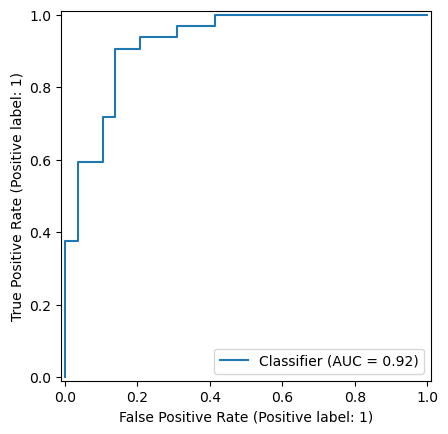

In [77]:
RocCurveDisplay.from_predictions(y_test,y_preds_true);

In [68]:
# Confusion matrix
y_preds=gs_log_reg_grid.predict(X_Test)
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

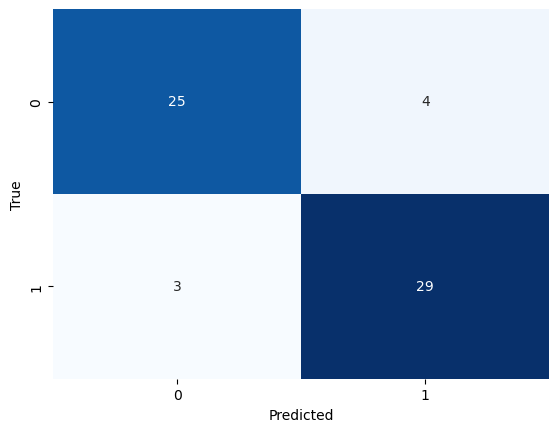

In [72]:
def plt_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots()
    ax=sb.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,cmap="Blues")
    ax.set(xlabel="Predicted",ylabel="True"),
plt_conf_mat(y_test,y_preds)

Now we have got a ROC curve and AUC metric and a confusion matrix, 

lets get a classification report as well as cross-validated precision, recall and f1 score

In [73]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
we are going to calculate precision,recall and f-1 score of our model  using corss-validation

In [81]:
#create a new model with best params
gs_log_reg_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [85]:
clf=LogisticRegression(C=0.23357214690901212, solver="liblinear")


In [100]:
# cross val acc
cv_acc=cross_val_score(clf,X,y,scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8479781420765027

In [101]:
# cross val precision
cv_pre=cross_val_score(clf,X,y,scoring="precision")
cv_pre=cv_pre.mean()
cv_pre

0.8215873015873015

In [102]:
# cross val recall
cv_recall=cross_val_score(clf,X,y,scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

0.9272727272727274

In [103]:
# cross vall f1
cv_f1=cross_val_score(clf,X,y,scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

0.8705403543192143

In [108]:
cv_report=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_pre,"Recall":cv_recall,"f1":cv_f1},index=[0])

In [109]:
cv_report

,Accuracy,Precision,Recall,f1
0,0.847978,0.821587,0.927273,0.87054


<Axes: >

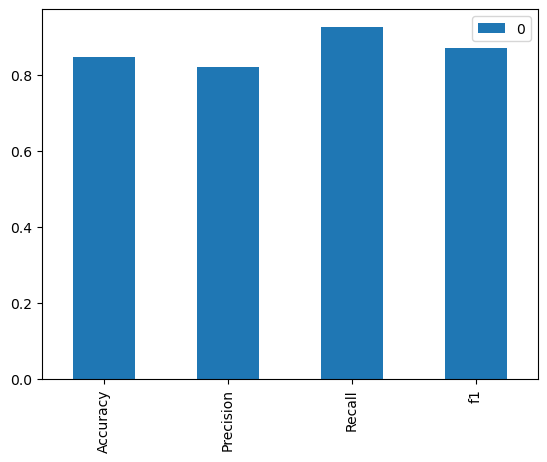

In [114]:
cv_report.T.plot.bar()

## Feature Importance
Feature importance is another as asking "which features cotributed most to the outcomes of the model and how did they contribute?" 

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for (Model name) feature importance

Lets find the f importnace for Logistic Regression

In [124]:
clf.fit(X_train,y_train)
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [125]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
# match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [131]:
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [132]:
coef_df=pd.DataFrame(feature_dict,index=[0])

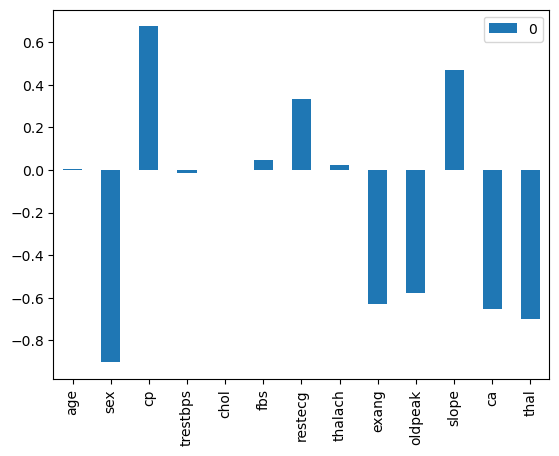

In [135]:
coef_df.T.plot.bar();

This graph show us power of relationship between target label and columns
* for example  As cp increases, the probability of the target being 1 increases
* in the other hand As ca increases, the probability of the target being 0 increases

In [136]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


the important things is rate between value

In [137]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?